YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


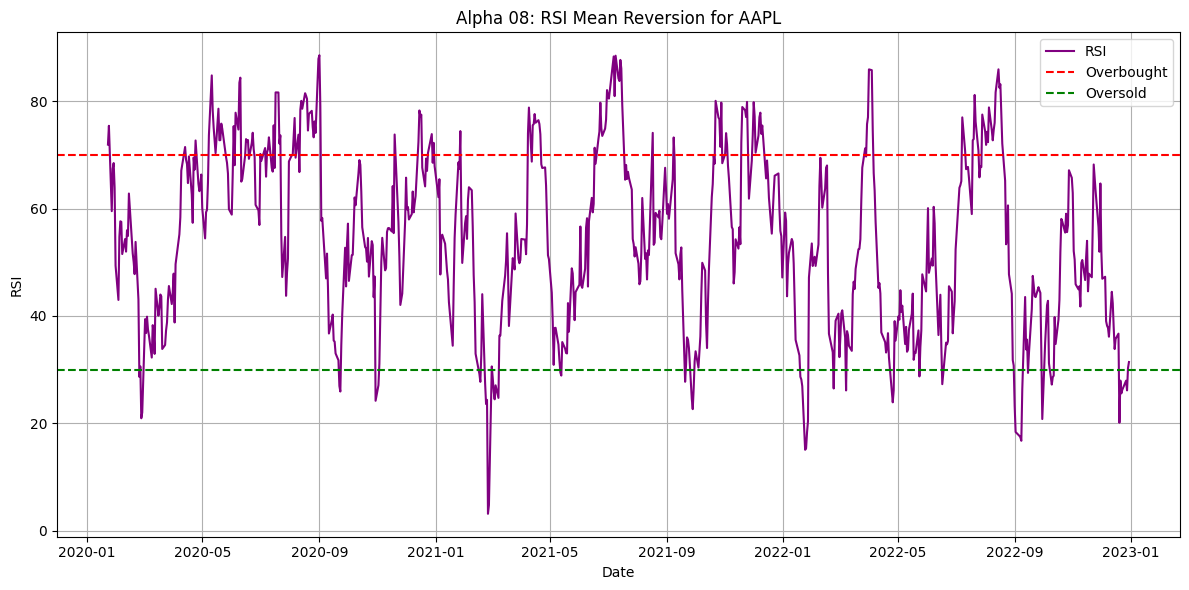

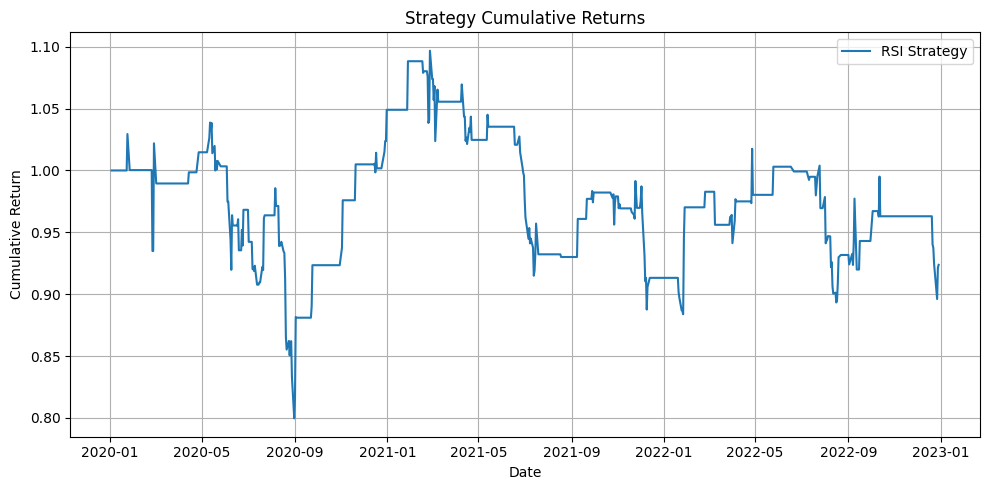

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# === Download historical data ===
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# === Extract 'Close' price ===
price = data[('Close', 'AAPL')] if isinstance(data.columns, pd.MultiIndex) else data['Close']

# === Calculate RSI ===
window = 14
delta = price.diff()

gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window=window).mean()
avg_loss = loss.rolling(window=window).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# === Generate Signals ===
signals = pd.Series(index=price.index, dtype='float64')
signals[rsi < 30] = 1     # Buy
signals[rsi > 70] = -1    # Sell
signals.fillna(0, inplace=True)

# === Backtest Strategy ===
daily_returns = price.pct_change().shift(-1)
strategy_returns = signals.shift(1) * daily_returns
cumulative_returns = (1 + strategy_returns).cumprod()

# === Plot RSI + Signals ===
plt.figure(figsize=(12, 6))
plt.plot(rsi, label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.title(f'Alpha 08: RSI Mean Reversion for {ticker}')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot Cumulative Returns ===
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='RSI Strategy')
plt.title("Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
